<a href="https://colab.research.google.com/github/sankarshana98/TopicModeling-LDA/blob/main/LDA%20Model-twitter-%23MeToo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open in Colab for better visualization

In [3]:
import pandas as pd
import os
os.chdir('..')
# Read data into tweets
tweets = pd.read_excel('/content/metoo_tweets_dec2017.xlsx')

# Print head
tweets.head()

,column_a,text,favorited,favoritecount,replytosn,created,truncated,replytosid,id,replytouid,statussource,screenname,retweetcount,isretweet,retweeted,longitude,latitude,location
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF,0.0,0,NaN,2017-11-29T23:59:00,0.0,NaN,9.360000e+17,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",ahmediaTV,0.0,0.0,0.0,NaN,NaN,NaN
1,2,@johnconyersjr @alfranken why have you guys ...,0.0,0,johnconyersjr,2017-11-29T23:59:00,0.0,NaN,9.360000e+17,266149840,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",JesusPrepper74,0.0,0.0,0.0,NaN,NaN,NaN
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...,0.0,0,NaN,2017-11-29T23:59:00,1.0,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",DemerisePotvin,0.0,0.0,0.0,NaN,NaN,NaN
3,4,Women have been talking about this crap the en...,0.0,0,NaN,2017-11-29T23:59:00,0.0,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",TheDawnStott,0.0,0.0,0.0,NaN,NaN,NaN
4,5,.@BetteMidler please speak to this sexual assa...,0.0,15,NaN,2017-11-29T23:59:00,0.0,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",scottygirl2014,11.0,0.0,0.0,NaN,NaN,NaN


In [4]:

# Remove the columns
tweets = tweets.drop(columns=['favorited', 'favoritecount', 'replytosn','truncated','replytosid', 'id', 'replytouid',
       'statussource', 'screenname', 'isretweet', 'retweeted',
       'longitude', 'latitude','location'], axis=1)
# Print out the first rows of papers
tweets.head()

,column_a,text,created,retweetcount
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF,2017-11-29T23:59:00,0.0
1,2,@johnconyersjr @alfranken why have you guys ...,2017-11-29T23:59:00,0.0
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...,2017-11-29T23:59:00,0.0
3,4,Women have been talking about this crap the en...,2017-11-29T23:59:00,0.0
4,5,.@BetteMidler please speak to this sexual assa...,2017-11-29T23:59:00,11.0


In [34]:
import re
# Remove punctuation
tweets['tweet_text_processed'] = tweets['text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert the titles to lowercase
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: x.lower())
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: re.sub('@[^\s]+','',str(x)))
tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: re.sub('rt+','',str(x)))

# Print out the first rows of papers
tweets['tweet_text_processed'].head()
tweets

<>:3: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \/
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-34-874d9f204456>:3: DeprecationWarning: invalid escape sequence \.
  tweets['tweet_text_processed'] = tweets['text'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
<ipython-input-34-874d9f204456>:5: DeprecationWarning: invalid escape sequence \/
  tweets['tweet_text_processed'] = tweets['tweet_text_processed'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
<ipython-input-34-874d9f204456>:7: DeprecationWarning: invalid escape sequence \s
  tweets['tweet_text_processed'] = tweets['tweet_text_processed'].map(lambda x: re.sub('@[^\s]+','',str(x)))


,column_a,text,created,retweetcount,tweet_text_processed
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF,2017-11-29T23:59:00,0.0,american harem #metoo
1,2,@johnconyersjr @alfranken why have you guys ...,2017-11-29T23:59:00,0.0,why have you guys not resigned yet liberal...
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...,2017-11-29T23:59:00,0.0,watched megan kelly ask joe keery this am if s...
3,4,Women have been talking about this crap the en...,2017-11-29T23:59:00,0.0,women have been talking about this crap the en...
4,5,.@BetteMidler please speak to this sexual assa...,2017-11-29T23:59:00,11.0,please speak to this sexual assault by durin...
...,...,...,...,...,...
398665,393131,RT @Suffragentleman: You can only choose one.....,2017-12-25T00:00:00,616.0,you can only choose one#metoo
398666,393132,"#MeToo, say victims of sexual harassment in Ja...",2017-12-25T00:00:00,0.0,#metoo say victims of sexual harassment in jap...
398667,393133,Susan Collins tries to #MeToo her way out of h...,2017-12-25T00:00:00,0.0,susan collins tries to #metoo her way out of h...
398668,393134,RT @OneMillionVjj: Punish those who choose not...,2017-12-25T00:00:00,5.0,punish those who choose not to_x000d__x000d_...


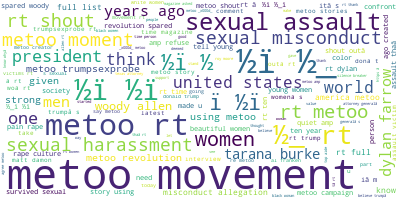

In [29]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tweets['tweet_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [8]:
import gensim

In [30]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','rt','#metoo'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = tweets.tweet_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['american', 'harem', 'metoo']


In [31]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
pip install pyldavis

In [33]:
# from pyldavis import pyLDAvis.gensim
import pyLDAvis.gensim_models as pgm
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepares_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pgm.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepares_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.164051  0.039512       1        1  21.240276
4      0.017004  0.296073       2        1  10.285806
3     -0.163030  0.000083       3        1  10.174999
9     -0.099254  0.045734       4        1   9.916220
0     -0.104160 -0.087177       5        1   9.040500
6      0.310104  0.003167       6        1   8.951991
5     -0.078852 -0.214282       7        1   8.598878
2      0.046368  0.128768       8        1   7.628667
7      0.136398 -0.158518       9        1   7.220566
8      0.099472 -0.053361      10        1   6.942097, topic_info=                 Term          Freq          Total Category  logprob  loglift
8677               ½i  62745.000000   62745.000000  Default  30.0000  30.0000
39                 d_  45910.000000   45910.000000  Default  29.0000  29.0000
86               d__x  45432.000000   45432.000000  Default  28.0000  28.0000
30             sexual  35485.000000   35485.000000  Default  27.0000  27.0000
53                amp  23084.000000   23084.000000  Default  26.0000  26.0000
...               ...           ...            ...      ...      ...      ...
2               metoo  22403.001797  313806.642200  Topic10  -2.5062   0.0280
35996  delegitimizing   1199.717942    2097.029581  Topic10  -5.4333   2.1091
75569           fraua   1130.080540    2035.647550  Topic10  -5.4931   2.0790
10148     scientology   1065.027651    1699.150367  Topic10  -5.5524   2.2004
143        harassment   1260.381849   13485.333210  Topic10  -5.3840   0.2974

[511 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
13130      5  0.999628     aa
1067       8  0.998505   able
157        1  0.936647  abuse
157        2  0.046850  abuse
157        3  0.000477  abuse
...      ...       ...    ...
8797       2  0.999809    ½_x
8797       6  0.000147    ½_x
9053       2  0.999324     ½a
8677       2  0.999975     ½i
39198      8  0.999422  œthat

[928 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 10, 1, 7, 6, 3, 8, 9])